In [1]:
%pylab inline
import pandas as pd
import scipy.stats as stats
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
rcParams['pdf.fonttype']=42
rcParams['font.family']='sans-serif'
rcParams['font.size']=10

In [3]:
def qnorm_dataframe( data ):
    """
    quantile normalize a dataframe with numeric values only!
    """
    rank_mean = data.stack().groupby(data.rank(method='first').stack().astype(int)).mean()
    qnormed_data    = data.rank(method='min').stack().astype(int).map(rank_mean).unstack()
    return qnormed_data

In [4]:
drugsens = pd.read_csv('/Data/HartLab/Drug_sensitivity/primary_replicate_collapsed_logfold_change.csv',
                        index_col=0)
drugsens.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578 entries, ACH-000001 to ACH-001321
Columns: 4686 entries, BRD-A00077618-236-07-6::2.5::HTS to BRD-M63173034-001-03-6::2.64076472::MTS004
dtypes: float64(4686)
memory usage: 20.7+ MB


In [5]:
druginfo = pd.read_csv('/Data/HartLab/Drug_sensitivity/primary_replicate_collapsed_treatment_info.csv',
                      index_col=0)
druginfo.fillna('-', inplace=True)
druginfo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4686 entries, BRD-A00055058-001-01-0::2.325889319::MTS004 to BRD-U51753822-000-01-1::2.5::HTS
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   broad_id      4686 non-null   object 
 1   name          4685 non-null   object 
 2   dose          4686 non-null   float64
 3   screen_id     4686 non-null   object 
 4   moa           4325 non-null   object 
 5   target        3464 non-null   object 
 6   disease.area  1916 non-null   object 
 7   indication    1916 non-null   object 
 8   smiles        4684 non-null   object 
 9   phase         4685 non-null   object 
dtypes: float64(1), object(9)
memory usage: 402.7+ KB


In [12]:
drugsens.head()

,BRD-A00077618-236-07-6::2.5::HTS,BRD-A00100033-001-08-9::2.5::HTS,BRD-A00147595-001-01-5::2.5::HTS,BRD-A00218260-001-03-4::2.5::HTS,BRD-A00376169-001-01-6::2.5::HTS,BRD-A00520476-001-07-4::2.5::HTS,BRD-A00546892-001-02-6::2.5::HTS,BRD-A00578795-001-04-3::2.5::HTS,BRD-A00758722-001-04-9::2.5::HTS,BRD-A00827783-001-24-6::2.5::HTS,...,BRD-K98557884-001-01-6::2.5::MTS004,BRD-K99077012-001-01-9::2.332734192::MTS004,BRD-K99199077-001-16-1::2.603211317::MTS004,BRD-K99431849-001-01-7::2.500018158::MTS004,BRD-K99447003-335-04-1::2.37737659::MTS004,BRD-K99506538-001-03-8::2.5::MTS004,BRD-K99616396-001-05-1::2.499991421::MTS004,BRD-K99879819-001-02-1::2.5187366::MTS004,BRD-K99919177-001-01-3::2.5::MTS004,BRD-M63173034-001-03-6::2.64076472::MTS004
ACH-000001,-0.015577,-0.449332,0.489379,0.206675,0.272730,0.021036,-0.025460,0.467158,-0.736306,0.644137,...,0.429238,0.204841,0.150055,-0.575404,-0.101247,0.399233,-0.127658,-0.141651,-1.153652,0.510464
ACH-000007,-0.095730,0.257943,0.772349,-0.438502,-0.732832,0.779201,0.426523,-1.288508,-0.476133,-0.277105,...,-0.471486,0.212998,-0.123230,0.625527,0.383198,0.212031,0.349225,-0.387439,-0.831461,0.323558
ACH-000008,0.379480,-0.596132,0.548056,0.422269,-0.216986,0.081866,0.145335,-0.570841,-0.512119,0.452698,...,-0.111951,0.534787,0.206642,-0.410153,-0.560722,-0.036088,0.158071,0.171043,-3.947090,0.099310
ACH-000010,0.118890,-0.231615,0.621937,-0.202707,-1.005139,-0.213739,0.020246,-0.795278,NaN,0.679571,...,0.200605,-0.075356,0.610310,-0.019413,-0.202971,0.218158,-0.411009,-0.181540,-3.010225,0.090652
ACH-000011,0.145346,-0.499274,0.267470,0.157804,-0.272286,0.207768,0.004464,-0.191680,-0.310375,0.112537,...,-0.076863,0.026002,0.139921,-0.261704,0.085339,0.447482,0.164620,-0.565251,-4.110627,0.222394


In [14]:
bf = pd.read_table('./Data/table_Avana2020Q4_CRISPRcleanR_corrected_all', index_col=0)
qbf = qnorm_dataframe( bf ).T
qbf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 18095 entries, A1BG to ZZZ3
dtypes: float64(18095)
memory usage: 111.6+ MB


In [18]:
feats = pd.read_table('./Data/features-bool-deDuped-2918feats-808cells.txt', index_col=0)
feats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 2918 entries, plasma_cell to CDH_VIM_lo
dtypes: bool(2918)
memory usage: 2.3+ MB


In [20]:
cell_lines_in_gdsc_and_avana = [x for x in qbf.index.values if x in drugsens.index.values]
len(cell_lines_in_gdsc_and_avana)

408

In [21]:
drugsens = drugsens.loc[cell_lines_in_gdsc_and_avana]
qbf = qbf.loc[cell_lines_in_gdsc_and_avana]
feats = feats.loc[cell_lines_in_gdsc_and_avana]

In [22]:
druginfo.head()

,broad_id,name,dose,screen_id,moa,target,disease.area,indication,smiles,phase
column_name,,,,,,,,,,
BRD-A00055058-001-01-0::2.325889319::MTS004,BRD-A00055058-001-01-0,RS-0481,2.325889,MTS004,immunostimulant,-,-,-,CC(NC(=O)C1CSCN1C(=O)c1ccccc1)c1ccccc1,Phase 2
BRD-A00842753-001-01-9::2.5::MTS004,BRD-A00842753-001-01-9,oleuropein,2.500000,MTS004,estrogen receptor agonist,GPER1,-,-,COC(=O)C1=COC(OC2OC(CO)C(O)C(O)C2O)\C(=C/C)C1C...,Phase 2
BRD-A02232681-001-01-8::2.5::MTS004,BRD-A02232681-001-01-8,isoleucine,2.500000,MTS004,-,"ACADSB, BCAT1, BCAT2, IARS, IARS2",-,-,CCC(C)C(N)C(O)=O,Launched
BRD-A04447196-001-01-8::2.5::MTS004,BRD-A04447196-001-01-8,gepefrine,2.500000,MTS004,adrenergic receptor agonist,-,cardiology,hypotension,CC(N)Cc1cccc(O)c1,Launched
BRD-A04971881-003-01-3::2.65294603::MTS004,BRD-A04971881-003-01-3,cloranolol,2.652946,MTS004,adrenergic receptor antagonist,"ADRB1, ADRB2, ADRB3",-,-,CC(C)(C)NCC(O)COc1cc(Cl)ccc1Cl,Launched


In [24]:
pik3ca_drugs = [x for x in druginfo.index if ('PIK3CA' in druginfo.loc[x,'target'])]
pik3ca_drugs

['BRD-K24666289-001-04-9::2.499988887::MTS004',
 'BRD-K02404261-001-16-7::2.5::HTS',
 'BRD-K07310275-001-02-5::2.5::HTS',
 'BRD-K07955840-001-02-3::2.5::HTS',
 'BRD-K07972848-001-02-0::2.5::HTS',
 'BRD-K12184916-001-15-4::2.5::HTS',
 'BRD-K23228615-001-02-8::2.5::HTS',
 'BRD-K27305650-001-16-6::2.5::HTS',
 'BRD-K28352084-001-02-3::2.5::HTS',
 'BRD-K29415052-050-04-8::2.5::HTS',
 'BRD-K30977212-001-02-8::2.5::HTS',
 'BRD-K42191735-001-05-3::2.5::HTS',
 'BRD-K43187018-001-03-3::2.52::HTS',
 'BRD-K44844162-001-01-6::2.5::HTS',
 'BRD-K49055432-001-04-2::2.5::HTS',
 'BRD-K49371609-003-03-8::2.5::HTS',
 'BRD-K52911425-001-09-8::2.5::HTS',
 'BRD-K54997624-001-06-0::2.5::HTS',
 'BRD-K56291712-001-01-0::2.5::HTS',
 'BRD-K58772419-001-07-0::2.5::HTS',
 'BRD-K59317601-001-05-5::2.5::HTS',
 'BRD-K60866521-001-07-1::2.5::HTS',
 'BRD-K63915849-001-03-7::2.5::HTS',
 'BRD-K64785675-001-04-0::2.5::HTS',
 'BRD-K67868012-001-07-6::2.5::HTS',
 'BRD-K81801188-001-02-8::2.5::HTS',
 'BRD-K93468883-001-02-0::

In [25]:
igf1r_drugs = [x for x in druginfo.index if ('IGF1R' in druginfo.loc[x,'target'])]
igf1r_drugs

['BRD-K22149900-001-03-9::2.371298578::MTS004',
 'BRD-K04833372-001-06-2::2.5::HTS',
 'BRD-K06749501-001-02-1::2.5::HTS',
 'BRD-K08310154-001-03-8::2.5::HTS',
 'BRD-K13049116-001-05-7::2.5::HTS',
 'BRD-K15179513-001-03-4::2.5::HTS',
 'BRD-K24593301-001-02-3::2.54::HTS',
 'BRD-K24696047-001-02-3::2.5::HTS',
 'BRD-K28392481-001-05-1::2.5::HTS',
 'BRD-K47869605-001-32-0::2.5::HTS',
 'BRD-K67537649-001-04-5::2.5::HTS',
 'BRD-K86118762-001-01-8::2.5::HTS']

In [26]:
akt_drugs = [x for x in druginfo.index if ('AKT' in druginfo.loc[x,'target'])]
akt_drugs

['BRD-A89082344-001-08-7::2.500026693::MTS004',
 'BRD-K04710043-001-17-8::2.5::MTS004',
 'BRD-A31990649-304-02-3::2.5::HTS',
 'BRD-A37704979-001-10-7::2.5::HTS',
 'BRD-K06543683-066-02-1::2.5::HTS',
 'BRD-K12040459-001-06-0::2.5::HTS',
 'BRD-K13049116-001-05-7::2.5::HTS',
 'BRD-K18787491-001-08-6::2.5::HTS',
 'BRD-K19939891-001-05-4::2.5::HTS',
 'BRD-K25412176-001-01-9::2.5::HTS',
 'BRD-K27305650-001-16-6::2.5::HTS',
 'BRD-K38332599-001-01-3::2.5::HTS',
 'BRD-K50168500-001-07-9::2.5::HTS',
 'BRD-K54330070-001-15-4::2.5::HTS',
 'BRD-K59745944-001-02-0::2.5::HTS',
 'BRD-K62810658-001-12-2::2.5::HTS',
 'BRD-K68065987-300-09-1::2.5::HTS',
 'BRD-K71480163-001-01-4::2.5::HTS',
 'BRD-K78177893-001-02-4::2.5::HTS',
 'BRD-K79404599-001-09-3::2.5::HTS',
 'BRD-K80431395-001-07-3::2.49::HTS',
 'BRD-K80431395-001-09-9::2.5::HTS',
 'BRD-K91701654-001-03-1::2.38::HTS',
 'BRD-K97118047-001-03-8::2.5::HTS',
 'BRD-K99023089-001-03-7::2.5::HTS']

In [99]:
insr_drugs = [x for x in druginfo.index if ('INSR' in druginfo.loc[x,'target'])]
insr_drugs

['BRD-K22149900-001-03-9::2.371298578::MTS004',
 'BRD-K04833372-001-06-2::2.5::HTS',
 'BRD-K06749501-001-02-1::2.5::HTS',
 'BRD-K24696047-001-02-3::2.5::HTS',
 'BRD-K50140147-001-10-1::2.5::HTS',
 'BRD-K85402309-001-06-6::2.5::HTS',
 'BRD-K85402309-389-03-2::2.5::HTS',
 'BRD-K86118762-001-01-8::2.5::HTS']

In [27]:
druginfo.loc[akt_drugs]

,broad_id,name,dose,screen_id,moa,target,disease.area,indication,smiles,phase
column_name,,,,,,,,,,
BRD-A89082344-001-08-7::2.500026693::MTS004,BRD-A89082344-001-08-7,perifosine,2.500027,MTS004,AKT inhibitor,AKT1,-,-,"CCCCCCCCCCCCCCCCCCOP(O)(=O)OC1CC[N+](C)(C)CC1,...",Phase 3
BRD-K04710043-001-17-8::2.5::MTS004,BRD-K04710043-001-17-8,hexamethylenebisacetamide,2.500000,MTS004,"AKT inhibitor, differentiation inducer, NFKB p...",AKT1,-,-,CC(=O)NCCCCCCNC(C)=O,Phase 2
BRD-A31990649-304-02-3::2.5::HTS,BRD-A31990649-304-02-3,adenosine-triphosphate,2.500000,HTS,adenosine receptor agonist,"ABCA1, ABCB1, ABCB11, ABCC2, ABCC8, ABCC9, ABC...",-,-,Nc1ncnc2n(cnc12)[C@@H]1O[C@H](COP(O)(=O)OP(O)(...,Phase 2
BRD-A37704979-001-10-7::2.5::HTS,BRD-A37704979-001-10-7,SB-203580,2.500000,HTS,p38 MAPK inhibitor,"AKT1, ALOX5, CHEK1, CYP2D6, CYP3A4, GAK, GSK3B...",-,-,CS(=O)c1ccc(cc1)-c1nc(c([nH]1)-c1ccncc1)-c1ccc...,Preclinical
BRD-K06543683-066-02-1::2.5::HTS,BRD-K06543683-066-02-1,bisindolylmaleimide-ix,2.500000,HTS,PKC inhibitor,"AKT1, GSK3B, LCK, MAPK1, MAPK11, MAPK12, MAPK1...",-,-,Cn1cc(C2=C(C(=O)NC2=O)c2cn(CCCSC(N)=N)c3ccccc2...,Preclinical
BRD-K12040459-001-06-0::2.5::HTS,BRD-K12040459-001-06-0,AT7867,2.500000,HTS,AKT inhibitor,"AKT2, GSK3B, PKIA, PRKACA",-,-,"Clc1ccc(cc1)C1(CCNCC1)c1ccc(cc1)-c1cn[nH]c1, C...",Preclinical
BRD-K13049116-001-05-7::2.5::HTS,BRD-K13049116-001-05-7,BMS-754807,2.500000,HTS,IGF-1 inhibitor,"AKT1, IGF1R",-,-,C[C@]1(CCCN1c1nc(Nc2cc(n[nH]2)C2CC2)c2cccn2n1)...,Phase 2
BRD-K18787491-001-08-6::2.5::HTS,BRD-K18787491-001-08-6,U-0126,2.500000,HTS,MEK inhibitor,"AKT1, CHEK1, GSK3B, LCK, MAP2K1, MAP2K2, MAP2K...",-,-,"N\C(Sc1ccccc1N)=C(C#N)/C(C#N)=C(/N)Sc1ccccc1N,...",Preclinical
BRD-K19939891-001-05-4::2.5::HTS,BRD-K19939891-001-05-4,TIC10,2.500000,HTS,"AKT inhibitor, TRAIL modulator","AKT1, MAPK1",-,-,Cc1ccccc1CN1CC2=C(CCN(Cc3ccccc3)C2=O)N2CCN=C12...,Phase 2


In [47]:
qbf.PIK3CA.corr( drugsens[ akt_drugs[0] ] )

0.075882711708683

In [90]:
#
# PIK3CA GOF muts vs. other
#
pik3ca_gof = feats.index[ where( feats.PIK3CA_GOF==True)[0] ]
pik3ca_wt = feats.index[ where( feats.PIK3CA_GOF==False)[0] ]
print( len(pik3ca_gof), len(pik3ca_wt))

54 354


(-0.6, 0.4)

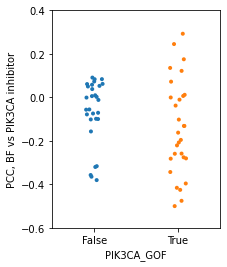

In [101]:
#
# pik3ca bf vs pik3ca inhibitors
# 
pcc_pik3i = pd.DataFrame( columns=['drug','PCC','PIK3CA_GOF'], dtype=float)

idx = 0
for pik3i in pik3ca_drugs:
    pcc_pik3 = qbf.loc[pik3ca_gof].PIK3CA.corr( drugsens[ pik3i ] )
    pcc_wt = qbf.loc[pik3ca_wt].PIK3CA.corr( drugsens[ pik3i ] )
    pcc_pik3i.loc[idx] = [pik3i, pcc_wt, 0]
    idx = idx + 1
    pcc_pik3i.loc[idx] = [pik3i, pcc_pik3, 1]
    idx = idx + 1

    
my_order = [False,True]
my_palette = {True: sns.color_palette("tab10")[1], False: sns.color_palette("tab10")[0]}

figure( figsize(3,4))
sns.stripplot( x='PIK3CA_GOF', y='PCC', data=pcc_pik3i, s=4, order=my_order, palette=my_palette)
ylabel('PCC, BF vs PIK3CA inhibitor')
ylim(-0.6,0.4)

In [106]:
stats.ttest_rel( pcc_pik3i[ pcc_pik3i.PIK3CA_GOF==0].PCC, pcc_pik3i[ pcc_pik3i.PIK3CA_GOF==1].PCC)

Ttest_relResult(statistic=2.729181111676294, pvalue=0.010848705825404363)

(-0.6, 0.4)

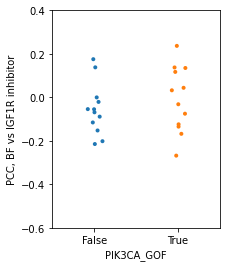

In [102]:
#
# pik3ca bf vs igf1r inhibitors
# 
pcc_igf1ri = pd.DataFrame( columns=['drug','PCC','PIK3CA_GOF'], dtype=float)


idx = 0
for drug in igf1r_drugs:
    pcc_igf1ri.loc[idx] = [drug, qbf.loc[pik3ca_wt].PIK3CA.corr( drugsens[ drug ] ) , 0]
    idx = idx + 1
    pcc_igf1ri.loc[idx] = [drug, qbf.loc[pik3ca_gof].PIK3CA.corr( drugsens[ drug ] ) , 1]
    idx = idx + 1

    
my_order = [False,True]
my_palette = {True: sns.color_palette("tab10")[1], False: sns.color_palette("tab10")[0]}

figure( figsize(3,4))
sns.stripplot( x='PIK3CA_GOF', y='PCC', data=pcc_igf1ri, s=4, order=my_order, palette=my_palette)
ylabel('PCC, BF vs IGF1R inhibitor')
ylim(-0.6,0.4)

In [108]:
stats.ttest_rel( pcc_igf1ri[ pcc_igf1ri.PIK3CA_GOF==0].PCC, pcc_igf1ri[ pcc_igf1ri.PIK3CA_GOF==1].PCC)

Ttest_relResult(statistic=-0.8169748059557724, pvalue=0.43128148693279955)

(-0.6, 0.4)

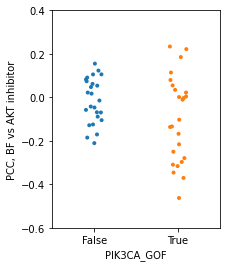

In [103]:
#
# pik3ca bf vs akti inhibitors
# 
pcc_akt1 = pd.DataFrame( columns=['drug','PCC','PIK3CA_GOF'], dtype=float)


idx = 0
for drug in akt_drugs:
    pcc_akt1.loc[idx] = [drug, qbf.loc[pik3ca_wt].PIK3CA.corr( drugsens[ drug ] ) , 0]
    idx = idx + 1
    pcc_akt1.loc[idx] = [drug, qbf.loc[pik3ca_gof].PIK3CA.corr( drugsens[ drug ] ) , 1]
    idx = idx + 1

    
my_order = [False,True]
my_palette = {True: sns.color_palette("tab10")[1], False: sns.color_palette("tab10")[0]}

figure( figsize(3,4))
sns.stripplot( x='PIK3CA_GOF', y='PCC', data=pcc_akt1, s=4, order=my_order, palette=my_palette)
ylabel('PCC, BF vs AKT inhibitor')
ylim(-0.6,0.4)

In [109]:
stats.ttest_rel( pcc_akt1[ pcc_akt1.PIK3CA_GOF==0].PCC, pcc_akt1[ pcc_akt1.PIK3CA_GOF==1].PCC)

Ttest_relResult(statistic=2.4950512080836034, pvalue=0.019871801355034423)

(-0.6, 0.4)

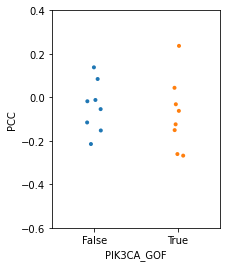

In [100]:
#
# pik3ca bf vs insr inhibitors
# 
pcc_insr = pd.DataFrame( columns=['drug','PCC','PIK3CA_GOF'], dtype=float)


idx = 0
for drug in insr_drugs:
    pcc_insr.loc[idx] = [drug, qbf.loc[pik3ca_wt].PIK3CA.corr( drugsens[ drug ] ) , 0]
    idx = idx + 1
    pcc_insr.loc[idx] = [drug, qbf.loc[pik3ca_gof].PIK3CA.corr( drugsens[ drug ] ) , 1]
    idx = idx + 1

    
my_order = [False,True]
my_palette = {True: sns.color_palette("tab10")[1], False: sns.color_palette("tab10")[0]}

figure( figsize(3,4))
sns.stripplot( x='PIK3CA_GOF', y='PCC', data=pcc_insr, s=4, order=my_order, palette=my_palette)
#ylabel('PCC, BF vs INSR inhibitor')
ylim(-0.6,0.4)

In [87]:
pcc_pik3i.nsmallest( 10, 'PCC')

,drug,PCC,PIK3CA_GOF
27,BRD-K44844162-001-01-6::2.5::HTS,-0.499794,1.0
17,BRD-K28352084-001-02-3::2.5::HTS,-0.475397,1.0
35,BRD-K54997624-001-06-0::2.5::HTS,-0.425069,1.0
49,BRD-K67868012-001-07-6::2.5::HTS,-0.415535,1.0
29,BRD-K49055432-001-04-2::2.5::HTS,-0.395769,1.0
32,BRD-K52911425-001-09-8::2.5::HTS,-0.380211,0.0
26,BRD-K44844162-001-01-6::2.5::HTS,-0.364580,0.0
34,BRD-K54997624-001-06-0::2.5::HTS,-0.356799,0.0
33,BRD-K52911425-001-09-8::2.5::HTS,-0.343021,1.0
28,BRD-K49055432-001-04-2::2.5::HTS,-0.319844,0.0


In [112]:
druginfo.loc[ pcc_pik3i[ pcc_pik3i.PIK3CA_GOF==1 ].nsmallest( 3, 'PCC').drug  ]

,broad_id,name,dose,screen_id,moa,target,disease.area,indication,smiles,phase
column_name,,,,,,,,,,
BRD-K44844162-001-01-6::2.5::HTS,BRD-K44844162-001-01-6,taselisib,2.5,HTS,PI3K inhibitor,PIK3CA,-,-,CC(C)n1nc(C)nc1-c1cn2CCOc3cc(ccc3-c2n1)-c1cnn(...,Phase 3
BRD-K28352084-001-02-3::2.5::HTS,BRD-K28352084-001-02-3,CH5132799,2.5,HTS,PI3K inhibitor,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG",-,-,"CS(=O)(=O)N1CCc2c1nc(nc2-c1cnc(N)nc1)N1CCOCC1,...",Phase 1
BRD-K54997624-001-06-0::2.5::HTS,BRD-K54997624-001-06-0,alpelisib,2.5,HTS,PI3K inhibitor,"PIK3CA, PIK3CB, PIK3CD, PIK3CG",-,-,Cc1nc(NC(=O)N2CCC[C@H]2C(N)=O)sc1-c1ccnc(c1)C(...,Phase 3


In [110]:
pcc_pik3i[ pcc_pik3i.PIK3CA_GOF==0 ].nsmallest( 3, 'PCC')

,drug,PCC,PIK3CA_GOF
32,BRD-K52911425-001-09-8::2.5::HTS,-0.380211,0.0
26,BRD-K44844162-001-01-6::2.5::HTS,-0.364580,0.0
34,BRD-K54997624-001-06-0::2.5::HTS,-0.356799,0.0


In [111]:
druginfo.loc[ pcc_pik3i[ pcc_pik3i.PIK3CA_GOF==0 ].nsmallest( 3, 'PCC').drug  ]

,broad_id,name,dose,screen_id,moa,target,disease.area,indication,smiles,phase
column_name,,,,,,,,,,
BRD-K52911425-001-09-8::2.5::HTS,BRD-K52911425-001-09-8,GDC-0941,2.5,HTS,PI3K inhibitor,"PIK3CA, PIK3CB, PIK3CD, PIK3CG",-,-,CS(=O)(=O)N1CCN(Cc2cc3nc(nc(N4CCOCC4)c3s2)-c2c...,Phase 2
BRD-K44844162-001-01-6::2.5::HTS,BRD-K44844162-001-01-6,taselisib,2.5,HTS,PI3K inhibitor,PIK3CA,-,-,CC(C)n1nc(C)nc1-c1cn2CCOc3cc(ccc3-c2n1)-c1cnn(...,Phase 3
BRD-K54997624-001-06-0::2.5::HTS,BRD-K54997624-001-06-0,alpelisib,2.5,HTS,PI3K inhibitor,"PIK3CA, PIK3CB, PIK3CD, PIK3CG",-,-,Cc1nc(NC(=O)N2CCC[C@H]2C(N)=O)sc1-c1ccnc(c1)C(...,Phase 3


In [91]:
pcc_akt1.nsmallest( 10, 'PCC')

,drug,PCC,PIK3CA_GOF
33,BRD-K68065987-300-09-1::2.5::HTS,-0.462533,1.0
25,BRD-K50168500-001-07-9::2.5::HTS,-0.370174,1.0
49,BRD-K99023089-001-03-7::2.5::HTS,-0.345526,1.0
35,BRD-K71480163-001-01-4::2.5::HTS,-0.315912,1.0
29,BRD-K59745944-001-02-0::2.5::HTS,-0.309282,1.0
43,BRD-K80431395-001-09-9::2.5::HTS,-0.296758,1.0
19,BRD-K25412176-001-01-9::2.5::HTS,-0.279112,1.0
41,BRD-K80431395-001-07-3::2.49::HTS,-0.249759,1.0
37,BRD-K78177893-001-02-4::2.5::HTS,-0.215652,1.0
24,BRD-K50168500-001-07-9::2.5::HTS,-0.210155,0.0


In [97]:
druginfo.loc['BRD-K68065987-300-09-1::2.5::HTS']

broad_id                                   BRD-K68065987-300-09-1
name                                                      MK-2206
dose                                                          2.5
screen_id                                                     HTS
moa                                                 AKT inhibitor
target                                           AKT1, AKT2, AKT3
disease.area                                                    -
indication                                                      -
smiles          NC1(CCC1)c1ccc(cc1)-c1nc2ccn3c(n[nH]c3=O)c2cc1...
phase                                                     Phase 2
Name: BRD-K68065987-300-09-1::2.5::HTS, dtype: object